## Анализе тональности текстов

### Загрузка данных и пакетов

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Corona_NLP_train.csv", encoding="latin-1")
print(df.head())
print(df.shape)

   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  
(41157, 6)


### Вывод случайных значений и обзор датафрейма

In [2]:
df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9692,13491,58443,International,20-03-2020,The March 2020 Cochrane consumer community new...,Extremely Positive
11374,15173,60125,All over the place,20-03-2020,Why is it that stock prices crash during or ri...,Extremely Negative
14292,18091,63043,"Coventry, England",21-03-2020,DidnÂt want to but I ventured out to the supe...,Extremely Positive
23830,27629,72581,"Freehold, NJ",26-03-2020,@cwillyard @benjaminchapman You being not bein...,Positive
18713,22512,67464,NaN,23-03-2020,n IF DOCTORS N NURSES R WEARING GLOVES N MASK ...,Neutral
18939,22738,67690,Helsinki,24-03-2020,Supermarket workers are also in the front line...,Extremely Positive
37817,41616,86568,Thuis,11-04-2020,From face masks to hand sanitizer North Housto...,Extremely Positive
36655,40454,85406,NaN,09-04-2020,@MSN What happened to all the companies that w...,Negative
5881,9680,54632,"Washington, DC",19-03-2020,Businesses in 26 states can reduce layoffs at ...,Extremely Positive
8942,12741,57693,"Lynchburg, VA",20-03-2020,The Blue Ridge Area Food Bank says they need v...,Positive


In [3]:
df.shape

(41157, 6)

In [5]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = df[["OriginalTweet", "Sentiment"]]
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Визаулизация

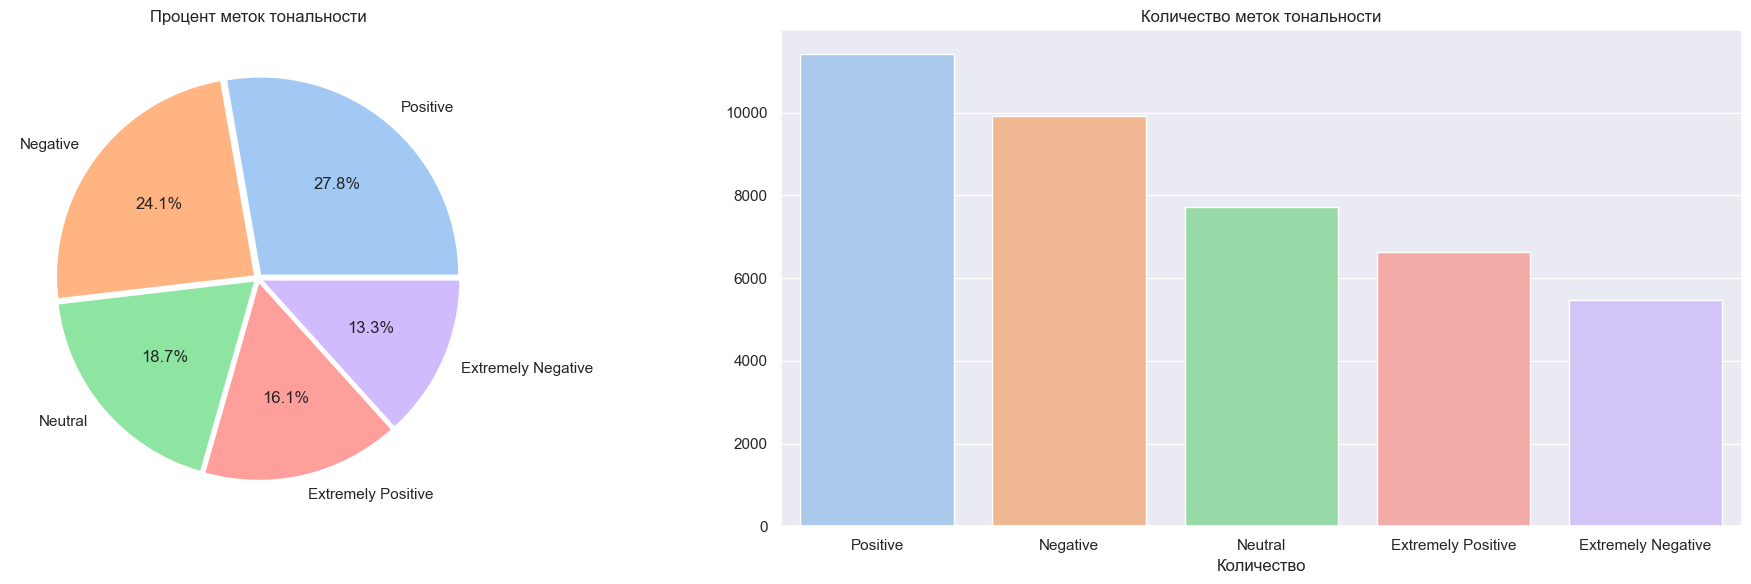

In [18]:
label_count = df["Sentiment"].value_counts()

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.set_theme(style="darkgrid", palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct="%1.1f%%", colors = color, explode=explode)
axes[0].set_title("Процент меток тональности")

sns.barplot(x=label_count.index, y = label_count.values, ax=axes[1])
axes[1].set_title("Количество меток тональности")
axes[1].set_xlabel("Метка")
axes[1].set_xlabel("Количество")

plt.tight_layout()
plt.show()


### Подсчет длины сообщений

<Axes: xlabel='len', ylabel='Density'>

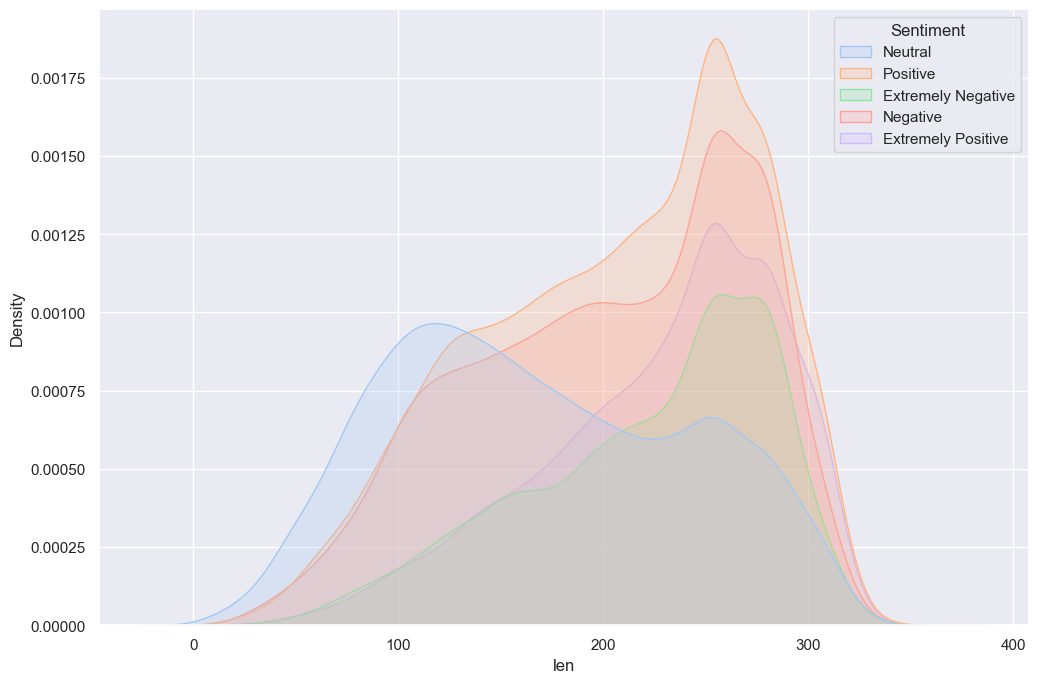

In [22]:
df["len"] = df["OriginalTweet"].apply(len)

plt.figure(figsize=(12,8))
sns.kdeplot(df, x=df["len"], fill=True, hue="Sentiment")

### BOW, Bag of Words, Мешок слов

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
matrix = cv.fit_transform(df["OriginalTweet"])

In [25]:
matrix.toarray()[:10, :5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]])

In [26]:
cv.get_feature_names_out()[:10]

array(['00', '000', '0000', '0000009375', '0000hrs', '000162', '00042',
       '000cr', '000francs', '000ksh'], dtype=object)

In [27]:
word_matrix = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names_out())

In [28]:
print(word_matrix)

       00  000  0000  0000009375  0000hrs  000162  00042  000cr  000francs  \
0       0    0     0           0        0       0      0      0          0   
1       0    0     0           0        0       0      0      0          0   
2       0    0     0           0        0       0      0      0          0   
3       0    0     0           0        0       0      0      0          0   
4       0    0     0           0        0       0      0      0          0   
...    ..  ...   ...         ...      ...     ...    ...    ...        ...   
41152   0    0     0           0        0       0      0      0          0   
41153   0    0     0           0        0       0      0      0          0   
41154   0    0     0           0        0       0      0      0          0   
41155   0    0     0           0        0       0      0      0          0   
41156   2    0     0           0        0       0      0      0          0   

       000ksh  ...  zzxwzxhc2v  zzz  zzzz  zâ  zã  zã¼rich  â² 

### Часто встречающиеся слова

In [31]:
df_sum = word_matrix.sum(axis=0, skipna=True)
bow = df_sum.sort_values(ascending=False)[:30]
bow = pd.DataFrame(bow, columns=["Frequncy"])

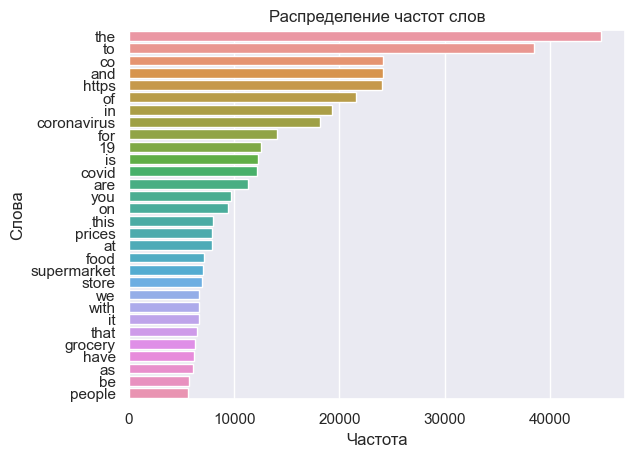

In [32]:
sns.barplot(x=bow["Frequncy"], y=bow.index)
plt.xlabel("Частота")
plt.ylabel("Слова")
plt.title("Распределение частот слов")
plt.show()


### Слова по оценке тональности

In [33]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/artemgolubnichiy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
def create_word_plot(text):
    text = df[df["Sentiment"] == text]
    word_text = " ".join(txt for txt in text["OriginalTweet"])

    tokens = word_tokenize(word_text)

    freq_dist = FreqDist(tokens)

    word_plot = freq_dist.plot(50, cumulative=False, linewidth=0.8, marker="o", color="red")

    plt.show()

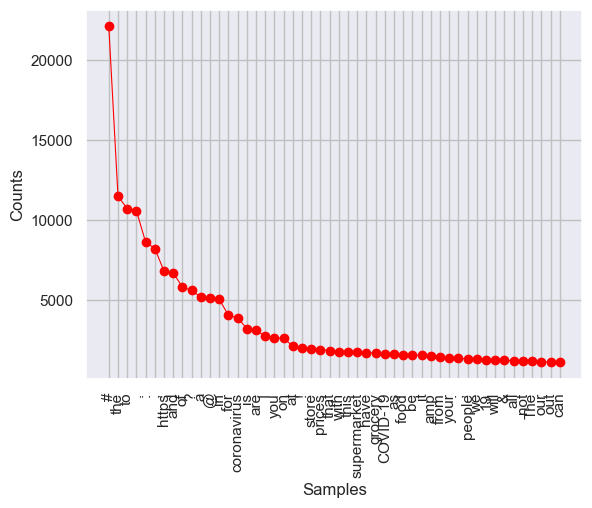

In [49]:
create_word_plot("Positive")

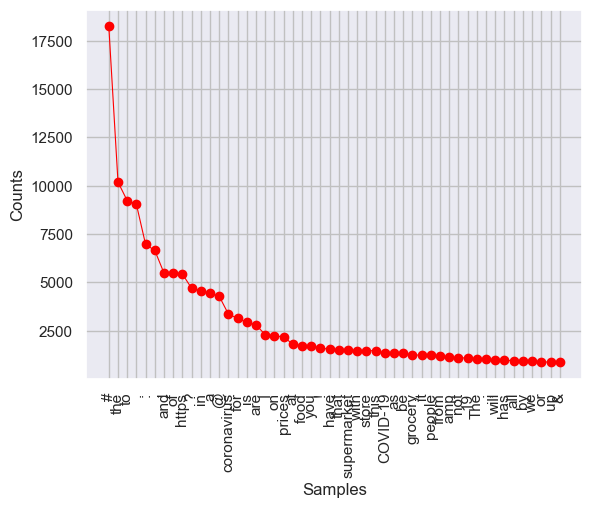

In [50]:
create_word_plot("Negative")

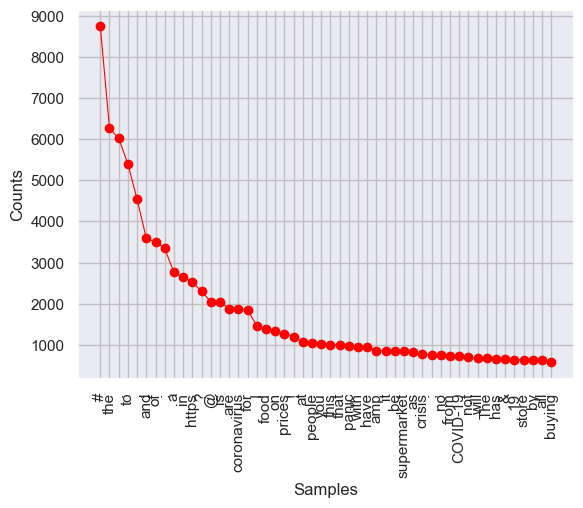

In [51]:
create_word_plot("Extremely Negative")

### Очистка данных

In [52]:
import string
import nltk
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"pic.\S+", "", text)
    text = re.sub(r"[^a-z'A-Z]", " ", text)
    text = re.sub(r"\s+ [a-z'A-Z]\s+", " ", text+ " ")
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words("english")
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text


In [53]:
df["new_text"] = df["OriginalTweet"].apply(clean_text)

In [57]:
df["OriginalTweet"].iloc[150]

'How come #TrumpIsAnIdiot or #trumpneedstoshutup is not trending?? For real!! People are freaked, stores canÂ\x92t keep food on their shelf, and the stock market is out of control. @realDonaldTrump please for the sake of the county shut up. #coronavirus'

### Стемминг

In [58]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()
words = word_tokenize(df["new_text"].iloc[1])
for w in words:
    print(w, ":", ps.stem(w))

advice : advic
talk : talk
neighbours : neighbour
family : famili
exchange : exchang
phone : phone
numbers : number
create : creat
contact : contact
list : list
phone : phone
numbers : number
neighbours : neighbour
schools : school
employer : employ
chemist : chemist
set : set
online : onlin
shopping : shop
accounts : account
poss : poss
adequate : adequ
supplies : suppli
regular : regular
meds : med
order : order


In [62]:
stemmed = []
for i in range(len(df)):
    stem_list = []
    words = word_tokenize(df["new_text"].iloc[i])
    for w in words:
        stem_list.append(ps.stem(w))
    stemmed.append(stem_list)

df["Stemmed"] = stemmed

In [63]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,new_text,Stemmed
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,[]
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,"[advic, talk, neighbour, famili, exchang, phon..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,"[coronaviru, australia, woolworth, give, elder..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...,"[food, stock, one, empti, pleas, dont, panic, ..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket covid outbreak paranoid food...,"[readi, supermarket, covid, outbreak, paranoid..."


In [64]:
df["Stemmed"] = df["Stemmed"].apply(" ".join)
df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,new_text,Stemmed
23538,27337,72289,"Bangalore, INDIA",26-03-2020,US Consumers' needs from different stakeholder...,Extremely Negative,consumers needs different stakeholders covid c...,consum need differ stakehold covid crisi wonde...
5539,9338,54290,"Bhagalpur,Bihar, Delhi,India",19-03-2020,Just In No need to panic need awareness in com...,Extremely Negative,need panic need awareness community union heal...,need panic need awar commun union health minis...
334,4133,49085,"New York, NY",16-03-2020,Panic grocery shopping is not necessary and ha...,Extremely Negative,panic grocery shopping necessary put people ri...,panic groceri shop necessari put peopl risk ta...
39510,43309,88261,??????? ??????? ????????,13-04-2020,Happy Monday Here Are My In Financial Markets ...,Positive,happy monday financial markets opec output cut...,happi monday financi market opec output cut oi...
23401,27200,72152,seoul koera,26-03-2020,To access the Konga N10m COVID 19 fund simply ...,Neutral,access konga covid fund simply add code solosa...,access konga covid fund simpli add code solosa...
10546,14345,59297,"Gloucester, UK.",20-03-2020,Don t panic Our guide on where to buy toilet p...,Positive,panic guide buy toilet paper covid outbreak be...,panic guid buy toilet paper covid outbreak bes...
11771,15570,60522,"New York, NY",20-03-2020,Just came back from the grocery store! Rations...,Positive,came back grocery store rations toilet paper g...,came back groceri store ration toilet paper go...
6064,9863,54815,kolkata,19-03-2020,Panic buying is putting additional pressure on...,Extremely Negative,panic buying putting additional pressure food ...,panic buy put addit pressur food deliveri netw...
13404,17203,62155,"Vaunac, France",21-03-2020,@integrated_agri Important tweet ?I suspect if...,Negative,important tweet suspect asked waste industry c...,import tweet suspect ask wast industri confirm...
40519,44318,89270,"Chicago, IL",13-04-2020,???? $CAG $GIS $K $KO \r\r\nConsumer Brands As...,Neutral,cag gis consumer brands association ceo state ...,cag gi consum brand associ ceo state global su...
